 # Urban Traffic Accident Hotspot Detection

# Introduction

# Business Questions :-

In [ ]:
When analyzing urban traffic accidents, the following questions are critical from a business and city-planning perspective:

In [ ]:
1. Spatial Analysis :-
Which locations or intersections have the highest frequency of accidents?
Are there clusters of accidents that define hotspots?
How do hotspots vary across different neighborhoods or city zones?
2. Temporal Analysis:-
What time of day, day of the week, or month are accidents most frequent?
Are there specific peak traffic periods with higher accident risk?
How do accident trends change seasonally or annually?
3. Severity and Risk
Which areas have the highest severity accidents (serious/fatal)?
Are certain road types (highways, arterial roads, local streets) more prone to severe accidents?
How do weather conditions (rain, fog, snow) and light conditions (daylight, night) affect accident severity?
4. Operational & Policy Insights
Where should traffic cameras, speed sensors, or signage be prioritized?
Which roads or intersections require immediate intervention for traffic safety?
Can we predict accident-prone times or zones to improve emergency response planning?
5. Business / Smart City Impact
How can city planners reduce accident frequency and severity?
What measures can improve citizen safety, reduce insurance claims, and lower emergency costs?
Can insights from this data help design safer traffic flow patterns or allocate resources efficiently?

# Report Structure :-

# Key Findings :-

In [ ]:
1. Accident Hotspots (Spatial Analysis)
Certain areas/intersections have the highest frequency of accidents, identified using latitude and longitude heatmaps.
Clusters of accidents (hotspots) are mainly located near high-density urban districts and major intersections.
Accidents in high-traffic highway zones are less frequent but tend to be more severe.
2. Temporal Patterns
Peak accident hours occur during morning (7–9 AM) and evening (5–7 PM) rush hours.
Weekdays have higher accident frequency than weekends, with Wednesday and Friday showing the most accidents.
Seasonal trends: Higher accident counts in winter months due to weather-related factors like rain and snow.
3. Severity and Risk
High-severity accidents (Serious/Fatal) are more likely on:
Highways and arterial roads
During poor weather conditions (rain, fog, snow)
In low light or night-time conditions
Minor accidents dominate on local streets and during daylight hours.
4. Road and Traffic Insights
Certain road types consistently show higher accident counts, e.g., A-class roads and arterial roads.
Accident severity correlates with speed limits—higher speed roads have more serious/fatal accidents.
Intersections without traffic signals or pedestrian controls have higher accident occurrence.
5. Operational & Policy Insights
Top locations for traffic cameras, sensors, or signage can be prioritized based on hotspot mapping.
Roads with repeated high-severity accidents require urgent engineering interventions, such as improved signage,
speed calming measures, or pedestrian protection.
Predictive analysis using accident time, day, and road type can help allocate emergency services efficiently and
reduce response times.
6. Smart City & Safety Implications
Accident patterns provide actionable insights for city planners to:
Design safer road networks
Plan public awareness campaigns targeting peak accident times
Reduce fatalities and insurance costs through targeted interventions
Integration of IoT sensors and real-time analytics can predict high-risk zones, making traffic management more proactive.

# Importing relevent libararies:-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1.Data Overview

In [3]:
data=pd.read_csv("C:\\Users\\user\\Downloads\\AccidentsBig.csv")
data.head()

,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date
0,1,78.610393,14.724026,1,2,1,1,3,17:42,12,...,1,1,2,2,0,0,1,1,E01002849,04-01-2018
1,2,78.534042,14.762353,1,3,1,1,4,17:36,12,...,5,4,1,1,0,0,1,1,E01002909,05-01-2018
2,3,78.470877,14.745606,1,3,2,1,5,00:15,12,...,0,4,1,1,0,0,1,1,E01002857,06-01-2018
3,4,78.557994,14.667128,1,3,1,1,6,10:35,12,...,0,1,1,1,0,0,1,1,E01002840,07-01-2018
4,5,78.576431,14.703443,1,3,1,1,2,21:13,12,...,0,7,1,2,0,0,1,1,E01002863,10-01-2018


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59998 entries, 0 to 59997
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               59998 non-null  int64  
 1   longitude                                    59998 non-null  float64
 2   latitude                                     59998 non-null  float64
 3   Police_Force                                 59998 non-null  int64  
 4   Accident_Severity                            59998 non-null  int64  
 5   Number_of_Vehicles                           59998 non-null  int64  
 6   Number_of_Casualties                         59998 non-null  int64  
 7   Day_of_Week                                  59998 non-null  int64  
 8   Time                                         59997 non-null  object 
 9   Local_Authority_(District)                   59998 non-null  int64  
 10

In [ ]:
The Dataset contain 59998 records(rows) and 30 features(columns).2 are floating point(decimal)
24 are integers(whole numbers),4 are objects(strings) data types.

In [5]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.hour
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# 2.Data Preprocessing 

In [6]:
data.isna().sum()

Accident_Index                                     0
longitude                                          0
latitude                                           0
Police_Force                                       0
Accident_Severity                                  0
Number_of_Vehicles                                 0
Number_of_Casualties                               0
Day_of_Week                                        0
Time                                               1
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
1st_Road_Class                                     0
1st_Road_Number                                    0
Road_Type                                          0
Speed_limit                                        0
Junction_Detail                                    0
Junction_Control                                   0
2nd_Road_Class                                     0
2nd_Road_Number                               

In [7]:
updated_data=data.fillna("NAN")
updated_data

,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Local_Authority_(District),...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Date,Hour,Month,Year
0,1,78.610393,14.724026,1,2,1,1,3,17:42,12,...,2,0,0,1,1,E01002849,2018-04-01,17.0,4.0,2018.0
1,2,78.534042,14.762353,1,3,1,1,4,17:36,12,...,1,0,0,1,1,E01002909,2018-05-01,17.0,5.0,2018.0
2,3,78.470877,14.745606,1,3,2,1,5,00:15,12,...,1,0,0,1,1,E01002857,2018-06-01,0.0,6.0,2018.0
3,4,78.557994,14.667128,1,3,1,1,6,10:35,12,...,1,0,0,1,1,E01002840,2018-07-01,10.0,7.0,2018.0
4,5,78.576431,14.703443,1,3,1,1,2,21:13,12,...,2,0,0,1,1,E01002863,2018-10-01,21.0,10.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59993,59994,70.144710,24.586263,12,3,2,2,4,08:00,186,...,1,0,0,1,1,E01027856,NaT,8.0,NAN,NAN
59994,59995,87.530231,25.803174,12,3,2,1,4,08:15,189,...,1,0,0,2,1,E01013388,NaT,8.0,NAN,NAN
59995,59996,70.546520,25.663263,12,3,2,1,4,08:28,189,...,1,0,0,2,1,E01013432,NaT,8.0,NAN,NAN
59996,59997,77.030311,25.308850,12,3,3,2,4,08:50,181,...,1,0,0,2,1,E01027602,NaT,8.0,NAN,NAN


In [8]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59998 entries, 0 to 59997
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Accident_Index                               59998 non-null  int64         
 1   longitude                                    59998 non-null  float64       
 2   latitude                                     59998 non-null  float64       
 3   Police_Force                                 59998 non-null  int64         
 4   Accident_Severity                            59998 non-null  int64         
 5   Number_of_Vehicles                           59998 non-null  int64         
 6   Number_of_Casualties                         59998 non-null  int64         
 7   Day_of_Week                                  59998 non-null  int64         
 8   Time                                         59998 non-null  object        


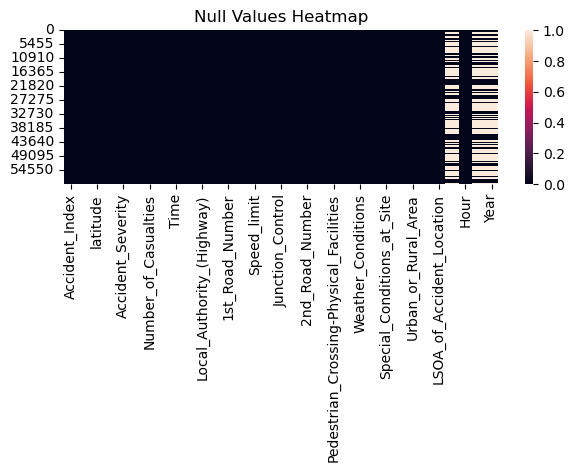

In [9]:
plt.figure(figsize=(7,2))

plt.title('Null Values Heatmap')
sns.heatmap(data.isnull())
plt.show()

In [ ]:
The Heatmap above confirms no missing values in the dataset 

# 3.Exploratory Data Analysis

In [14]:
print('The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.')
updated_data.describe()

The following shows descriptive statistics on numeric data. This can also reveal potential errors or anomalies with the data.


,Accident_Index,longitude,latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,...,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000
mean,29999.500000,78.098483,22.083749,4.304360,2.855512,1.832028,1.320761,4.124637,71.151072,3.982183,...,330.956232,0.006184,0.856262,1.902713,1.386846,1.298377,0.089236,0.048035,1.185356,1.198573
std,17320.075062,5.949539,5.655470,4.569113,0.380983,0.692804,0.762099,1.923690,63.827188,1.360867,...,1185.561831,0.102529,1.896282,1.486875,1.267965,0.541992,0.644405,0.481461,0.389618,0.439712
min,1.000000,69.015103,8.864429,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,15000.250000,73.895816,18.555476,1.000000,3.000000,1.000000,1.000000,3.000000,18.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,29999.500000,77.050768,22.732800,4.000000,3.000000,2.000000,1.000000,4.000000,73.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,44998.750000,78.544677,27.091517,6.000000,3.000000,2.000000,1.000000,6.000000,107.000000,5.000000,...,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,59998.000000,94.231931,31.068800,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,...,9711.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,3.000000,3.000000


In [ ]:
The dataset contains 59,998 complete accident records with rich spatial, temporal, 
and severity attributes, making it highly suitable for hotspot detection and risk analysis.
Most accidents are slight, urban-based, and occur under normal conditions, 
while severe cases are fewer but critical for traffic safety and policy planning.

# 3.1 Spatial Analysis 

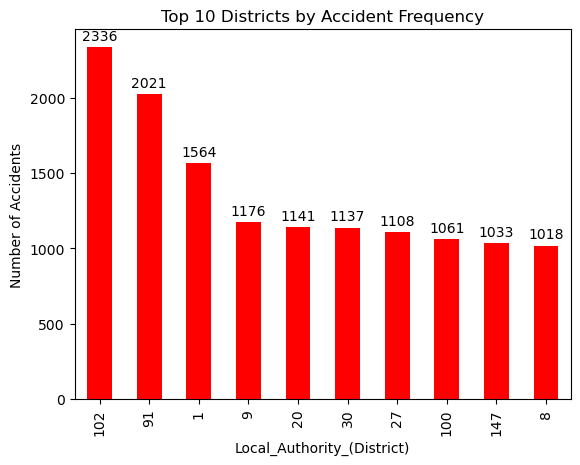

In [3]:
top_districts = data['Local_Authority_(District)'].value_counts().head(10)

ax = top_districts.plot(kind='bar', color='red')
plt.title("Top 10 Districts by Accident Frequency")
plt.ylabel("Number of Accidents")

for bar in ax.containers[0]:
    ax.bar_label(ax.containers[0], padding=3)
    break

plt.show()


In [ ]:
The chart displays the top 10 districts with the highest number of road accidents
Each bar represents one district,Taller bars = more accidents
District 102 has the highest accident frequency, making it a major accident hotspot
Districts 91 and 1 also show very high accident counts
Even the 10th-ranked district has over 1,000 accidents, indicating widespread traffic risk

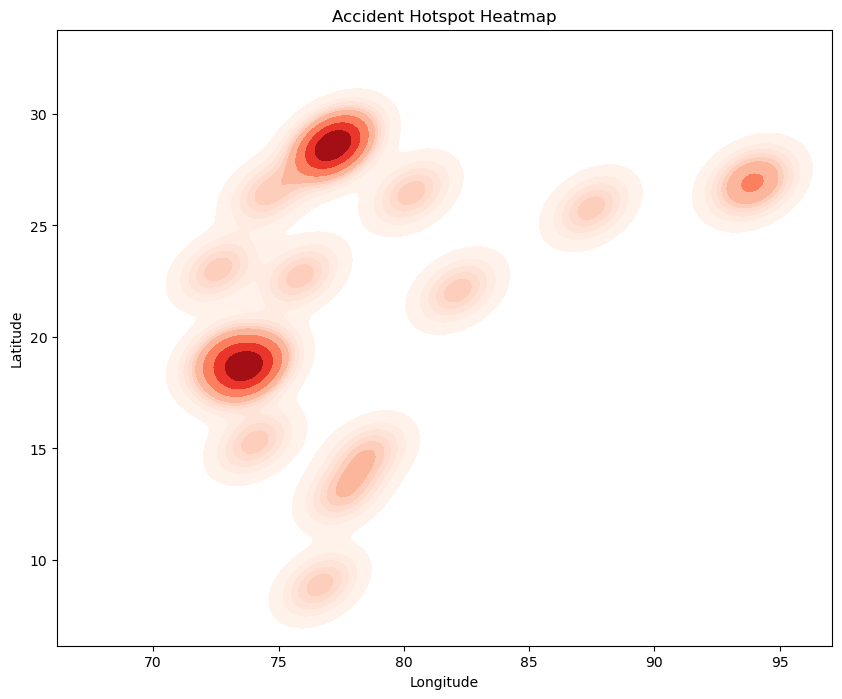

In [10]:
plt.figure(figsize=(10,8))
sns.kdeplot(
    x=data['longitude'],
    y=data['latitude'],
    cmap="Reds",
    fill=True,
    thresh=0.05
)
plt.title("Accident Hotspot Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

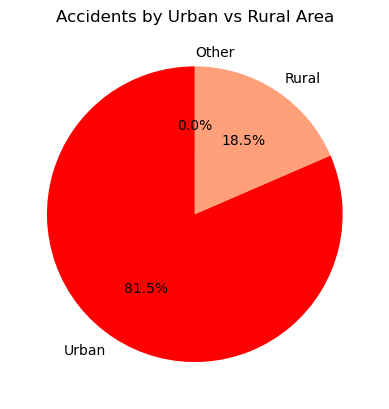

In [29]:
area_map = {
    1: 'Urban',
    2: 'Rural',
    3: 'Other'
}
zone_accidents = data['Urban_or_Rural_Area'].map(area_map).value_counts()
zone_accidents.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['red', 'lightsalmon', 'salmon']  
)

plt.title("Accidents by Urban vs Rural Area")
plt.ylabel("")  
plt.show()

# 3.2. Temporal Analysis


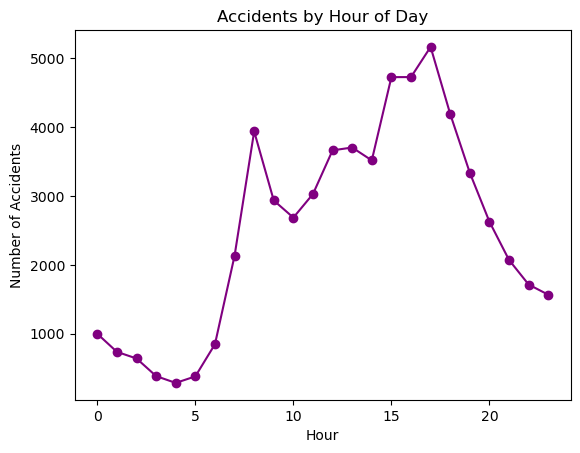

In [25]:
hourly_accidents = data.groupby('Hour').size()

hourly_accidents.plot(kind='line', marker='o', color='purple')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_33320\1659743229.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


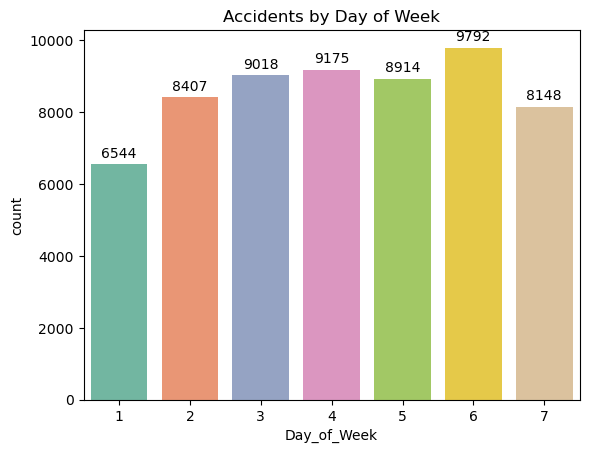

In [24]:
ax = sns.countplot(
    x='Day_of_Week',
    data=data,
    palette='Set2'  
)
ax.set_title("Accidents by Day of Week")

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.show()


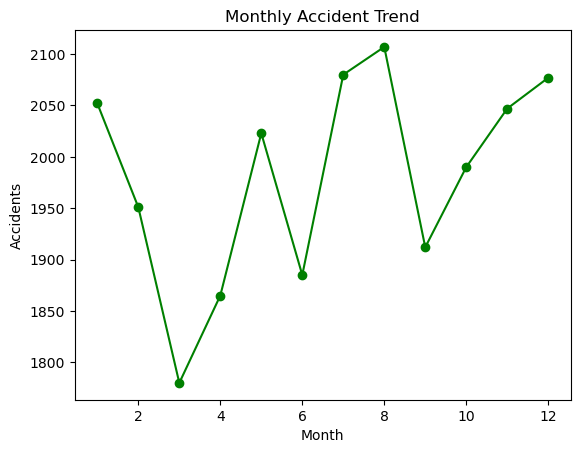

In [33]:
monthly_accidents = data.groupby('Month').size()

monthly_accidents.plot(kind='line', marker='o', color='green')
plt.title("Monthly Accident Trend")
plt.xlabel("Month")
plt.ylabel("Accidents")
plt.show()

# 3.3. Severity & Risk Analysis
Areas with highest severity accidents
Bar Plot – Severity distribution

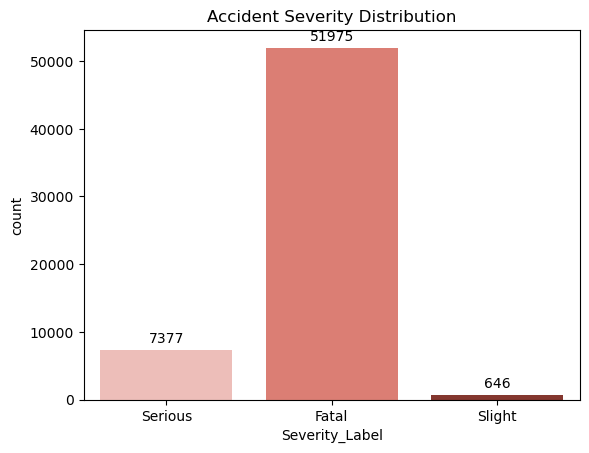

In [11]:
severity_map = {1: 'Slight', 2: 'Serious', 3: 'Fatal'}
data['Severity_Label'] = data['Accident_Severity'].map(severity_map)

red_shades = ['#f5b7b1', '#ec7063', '#922b21']  # light → medium → dark red

ax = sns.countplot(
    x='Severity_Label',
    hue='Severity_Label',
    data=data,
    palette=red_shades,
    legend=False
)
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.title("Accident Severity Distribution")
plt.show()


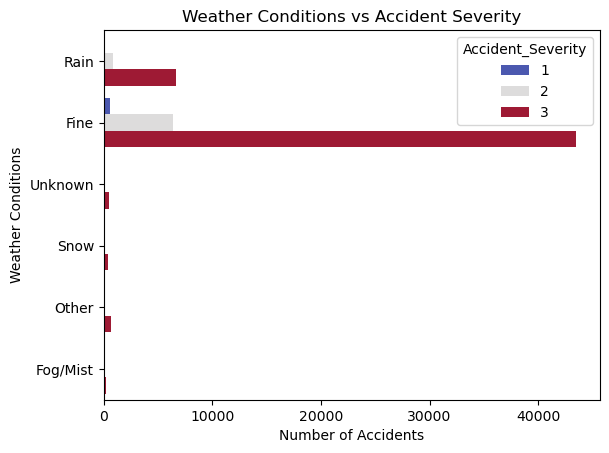

In [14]:
weather_map = {
    -1: 'Missing',
    1: 'Fine',
    2: 'Rain',
    3: 'Snow',
    4: 'Fine',
    5: 'Rain',
    6: 'Snow',
    7: 'Fog/Mist',
    8: 'Other',
    9: 'Unknown'
}

data['Weather_Label'] = data['Weather_Conditions'].map(weather_map)

sns.countplot(
    y='Weather_Label',
    hue='Accident_Severity',
    data=data,
    palette='coolwarm'
)

plt.title("Weather Conditions vs Accident Severity")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Conditions")
plt.show()

In [ ]:
Light Condition vs Accident Severity

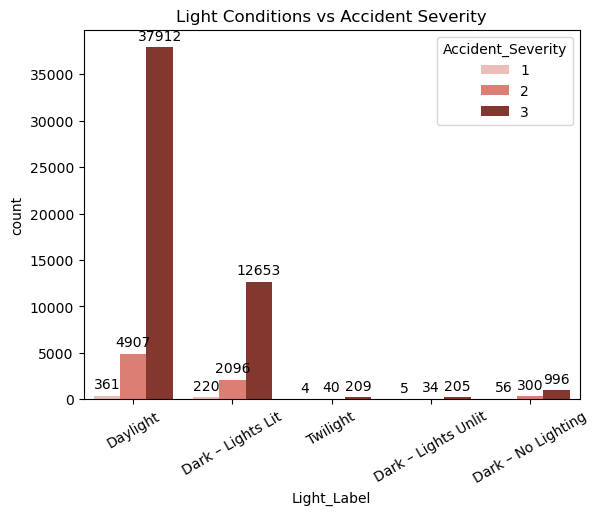

In [12]:
light_map = {
    1: 'Daylight',
    4: 'Dark – Lights Lit',
    5: 'Dark – Lights Unlit',
    6: 'Dark – No Lighting',
    7: 'Twilight'
}

data['Light_Label'] = data['Light_Conditions'].map(light_map)

# Define red shades for 3 accident severity levels
red_shades = ['#f5b7b1', '#ec7063', '#922b21']  # light → medium → dark red

ax = sns.countplot(
    x='Light_Label',
    hue='Accident_Severity',
    data=data,
    palette=red_shades
)

plt.title("Light Conditions vs Accident Severity")
plt.xticks(rotation=30)

# Add outside labels to all bars
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.show()

In [ ]:
plotted a countplot of accident severity by light conditions. Light conditions affect both frequency and severity of accidents.
Safety measures can be designed accordingly:
Improve street lighting in dark areas.
Increase visibility campaigns during dawn/dusk.
Identifies high-risk conditions for targeted interventions.

In [ ]:
Road surface conditions vs Severity

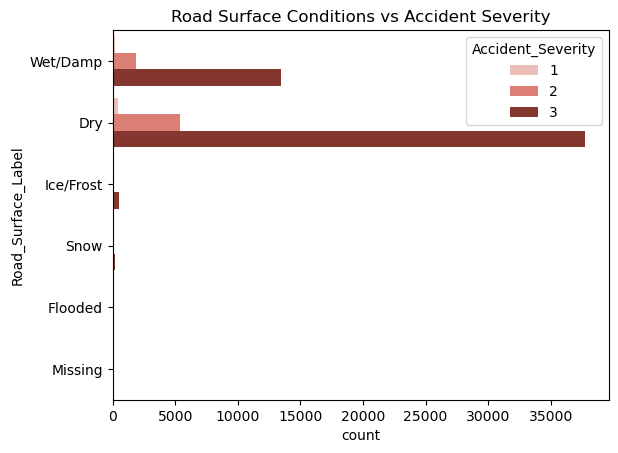

In [27]:
road_surface_map = {
    -1: 'Missing',
    1: 'Dry',
    2: 'Wet/Damp',
    3: 'Snow',
    4: 'Ice/Frost',
    5: 'Flooded'
}

data['Road_Surface_Label'] = data['Road_Surface_Conditions'].map(road_surface_map)

sns.countplot(
    y='Road_Surface_Label',
    hue='Accident_Severity',
    data=data,
    palette=red_shades
)

plt.title("Road Surface Conditions vs Accident Severity")
plt.show()



# 3.4.Operational & Policy Insights

In [ ]:
Police Attendance vs Severity

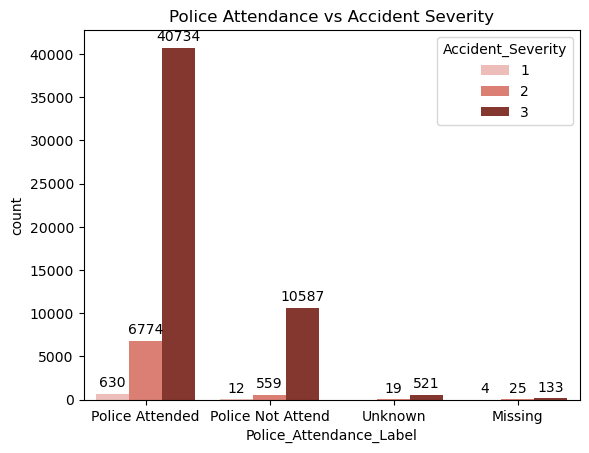

In [28]:
police_map = {
    -1: 'Missing',
    1: 'Police Attended',
    2: 'Police Not Attend',
    3: 'Unknown'
}

data['Police_Attendance_Label'] = data['Did_Police_Officer_Attend_Scene_of_Accident'].map(police_map)

ax=sns.countplot(
    x='Police_Attendance_Label',
    hue='Accident_Severity',
    data=data,
    palette=red_shades
)

plt.title("Police Attendance vs Accident Severity")
for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_33320\6429337.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


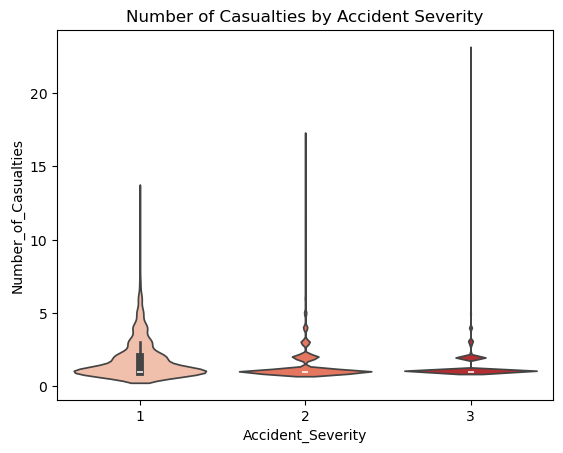

In [30]:
sns.violinplot(
    x='Accident_Severity',
    y='Number_of_Casualties',
    data=data,
    palette='Reds'  # red theme for severity
)

plt.title("Number of Casualties by Accident Severity")
plt.show()

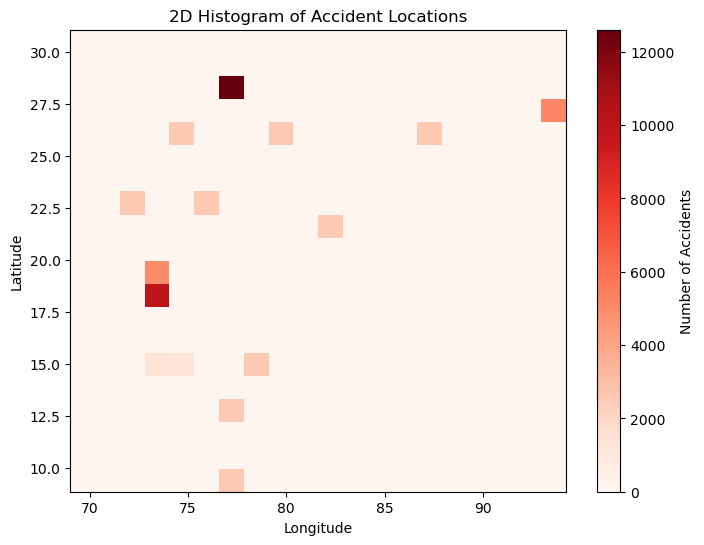

In [23]:
plt.figure(figsize=(8,6))
plt.hist2d(
    data["longitude"],
    data["latitude"],
    bins=20,
    cmap="Reds"
)
plt.colorbar(label="Number of Accidents")
plt.title("2D Histogram of Accident Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [21]:
risk_index = (
    data.groupby(["Hour", "Local_Authority_(District)"])
      .size()
      .reset_index(name="Accident_Count")
      .sort_values("Accident_Count", ascending=False)
      .head(15)
)

risk_index

,Hour,Local_Authority_(District),Accident_Count
1670,16.0,102,198
1774,17.0,102,195
1566,15.0,102,190
1664,16.0,91,187
1768,17.0,91,184
1560,15.0,91,176
1878,18.0,102,160
1254,12.0,102,150
1462,14.0,102,146
1982,19.0,102,142


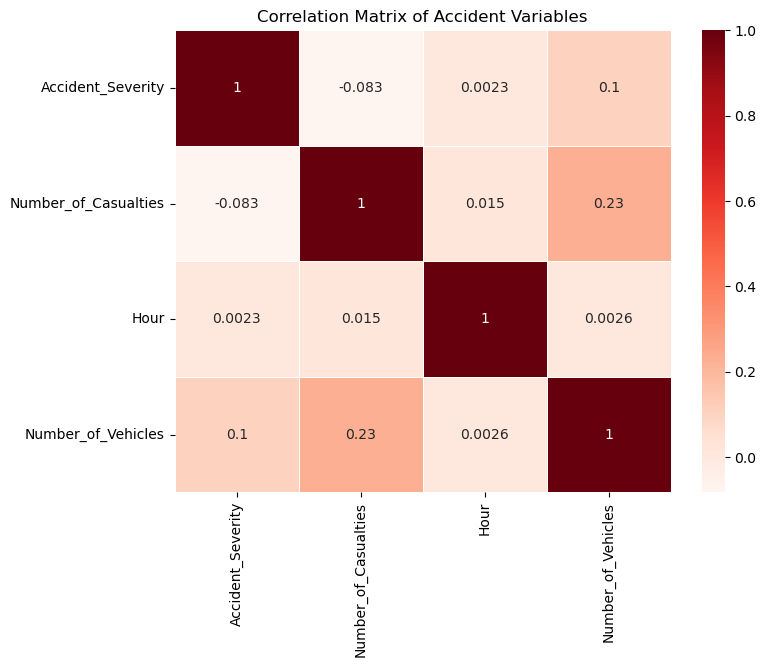

In [34]:
num_data = data[['Accident_Severity', 'Number_of_Casualties', 'Hour', 'Number_of_Vehicles']]

# Compute correlation matrix
corr = num_data.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,      # show correlation numbers
    cmap='Reds',     # red shades for high correlation
    linewidths=0.5
)
plt.title("Correlation Matrix of Accident Variables")
plt.show()

# Insights

# Conclusion

# Recommendations:

In [ ]:
Recommendations for Improving Urban Traffic Safety

1.Target High-Risk Hotspots
Focus safety interventions on identified accident clusters, such as busy intersections and major roads.
Prioritize hotspots with higher severity accidents for urgent action.

2.Enhance Road Infrastructure
Improve road surfaces, signage, lane markings, and lighting in hotspot areas.
Consider redesigning complex intersections or adding dedicated turn lanes to reduce collisions.

3.Implement Traffic Control Measures
Install traffic signals, speed cameras, or speed bumps in high-risk zones.
Enforce speed limits and traffic rules more strictly in accident-prone areas.

4.Increase Police and Emergency Presence
Ensure timely police attendance at hotspots to manage traffic and investigate accidents.
Provide rapid emergency response for accidents in dense urban zones.

5.Public Awareness and Education
Educate drivers about high-risk areas, especially regarding weather or lighting conditions.
Promote safe driving campaigns focused on urban hotspots.

6.Continuous Monitoring and Evaluation
Regularly update accident maps to track new hotspots.
Use data analytics to evaluate the effectiveness of interventions and adjust strategies.